Imagina la implementación de "undo" de una aplicación en que se editan objetos gráficos 

Hay acciones como agrandar, rotar, trasladar, etc. 

**La idea del patrón comando es encapsular esas acciones como objetos**

Por ej: Undo consiste simplemente en aplicar los objetos en el orden inverso


Primero creamos la clase Command, la cual tendrá un método execute. 

In [1]:
require 'fileutils'

class Command
  attr_reader :description
  def initialize(description)
    @description = description
  end 
  def
    execute 
  end 
end 

SyntaxError: invalid syntax (<ipython-input-1-f04f063abc0a>, line 1)

El método "execute" especificará la acción que está guardando la clase.

En el valor super le están pasando una descripción a Command.

In [23]:
class CreateFile < Command
  def initialize(path, contents)
    super("Create file: #{path}")
    @path = path
    @contents = contents
  end 
  def execute
    f = File.open(@path, "w")
    f.write(@contents)
    f.close
  end 
end 

class DeleteFile < Command
  def initialize(path)
    super("Delete file: #{path}")
    @path = path
  end
  def execute
    File.delete(@path)
  end 
end 

class CopyFile < Command
  def initialize(source, target)
    super("Copy file: #{source} to #{target}")
    @source = source
    @target = target
  end 
  def execute
    FileUtils.copy(@source, @target)
  end 
end 


:execute

Se instancian los objetos y finalmente se proceden a ejecutar todas las acciones que poseían en sus respectivos métodos execute.

In [26]:
cr1 = CreateFile.new("file1.txt", "contenido")
cr2 = CreateFile.new("file2.txt", "otra cosa")
cp1 = CopyFile.new("file1.txt", "file3.txt")
cp2 = CopyFile.new("file2.txt", "file4.txt")
cd1 = DeleteFile.new('file1.txt')
cd2 = DeleteFile.new('file2.txt')

commands = [cr1, cr2, cp1, cp2, cd1, cd2]
commands.each {|command| command.execute} 


[#<CreateFile:0x00007fbfb69a9a20 @path="file1.txt", @contents="contenido">, #<CreateFile:0x00007fbfb69a9980 @path="file2.txt", @contents="otra cosa">, #<CopyFile:0x00007fbfb69a9868 @description="Copy file: file1.txt to file3.txt", @source="file1.txt", @target="file3.txt">, #<CopyFile:0x00007fbfb69a9750 @description="Copy file: file2.txt to file4.txt", @source="file2.txt", @target="file4.txt">, #<DeleteFile:0x00007fbfb69a96b0 @description="Delete file: file1.txt", @path="file1.txt">, #<DeleteFile:0x00007fbfb69a9638 @description="Delete file: file2.txt", @path="file2.txt">]

Podemos ver que command:

**->se representa una acción como un objeto**

**->permite ejecución no inmediata (cola)** 

**->pueden guardarse acciones en caso de un restart**

**->permite implementar undo** ( simplemente saco de la lista el ultimo comando y vuelvo a ejecutar )

Podemos ver que la relación es de herencia, donde la clase comando hereda a las subclases que definen las acciones como objetos

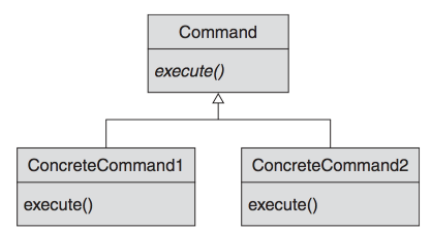